# Data Science Internship at Widhya

## Mission: Covid -19 Analysis (Quantitative Modeling)

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Microtask - 3: Data Collection & Visualization

#### Reading Dataset

In [2]:
df=pd.read_csv('covid.csv')

#### Preview of dataset

In [3]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30-01-2020,Kerala,1,0,0,0
1,2,31-01-2020,Kerala,1,0,0,0
2,3,01-02-2020,Kerala,2,0,0,0
3,4,02-02-2020,Kerala,3,0,0,0
4,5,03-02-2020,Kerala,3,0,0,0


In [4]:
df.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21-03-2020,Jammu and Kashmir,4,0,0,0
266,267,21-03-2020,Ladakh,13,0,0,0
267,268,21-03-2020,Uttar Pradesh,23,1,9,0
268,269,21-03-2020,Uttarakhand,3,0,0,0
269,270,21-03-2020,West Bengal,3,0,0,0


#### Shape of Dataset

In [5]:
df.shape

(270, 7)

#### Info of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


#### Identifying if any null values in dataset

In [7]:
df.isna().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

#### Grouping Data as per Dates

In [8]:
df1 = df.drop(columns = ['Sno','State/UnionTerritory']).groupby(by = ['Date'],sort = False,as_index = False)
df1 = df1.sum()

In [9]:
df1.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30-01-2020,1,0,0,0
1,31-01-2020,1,0,0,0
2,01-02-2020,2,0,0,0
3,02-02-2020,3,0,0,0
4,03-02-2020,3,0,0,0


#### Adding new columns to existing dataset

In [10]:
df1['Total_cases'] = df1.sum(axis = 1)

In [11]:
df1.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
0,30-01-2020,1,0,0,0,1
1,31-01-2020,1,0,0,0,1
2,01-02-2020,2,0,0,0,2
3,02-02-2020,3,0,0,0,3
4,03-02-2020,3,0,0,0,3


In [12]:
df1.tail()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
47,17-03-2020,113,24,14,3,154
48,18-03-2020,126,25,14,3,168
49,19-03-2020,148,25,20,4,197
50,20-03-2020,191,32,23,4,250
51,21-03-2020,244,39,23,4,310


#### What where the total number of cases on '04/03/2020' ?

In [13]:
df1.loc[df1['Date']=='04-03-2020']

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
34,04-03-2020,12,16,3,0,31


#### Trend Analysis

Text(0, 0.5, 'Total Cases')

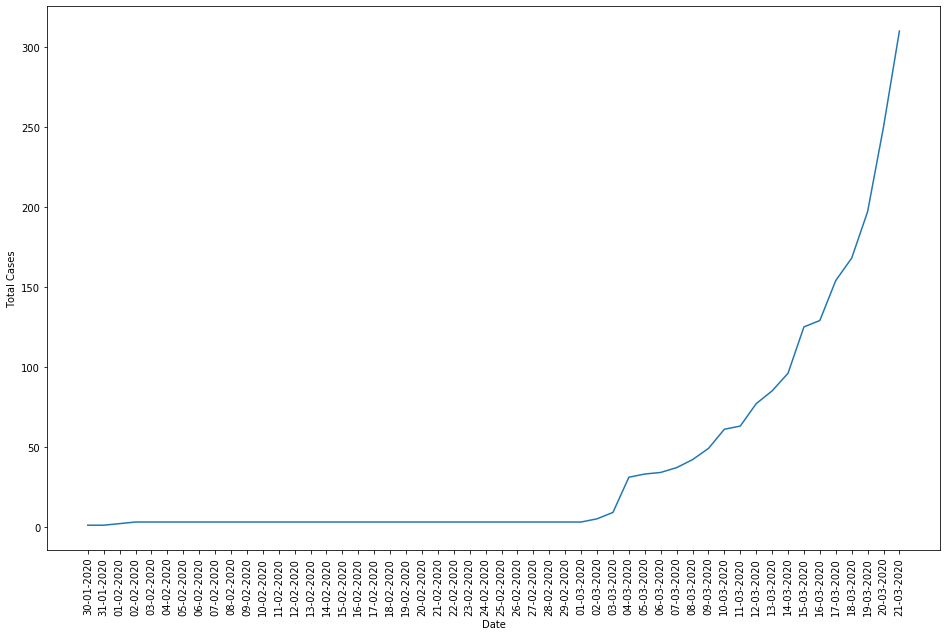

In [14]:
size = (16,10)
fig, ax = plt.subplots(figsize=size)
ax = plt.plot(df1['Date'],df1['Total_cases'])
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total Cases',fontsize=10)

#### Comparison of covid cases

Text(0, 0.5, 'Total Cases')

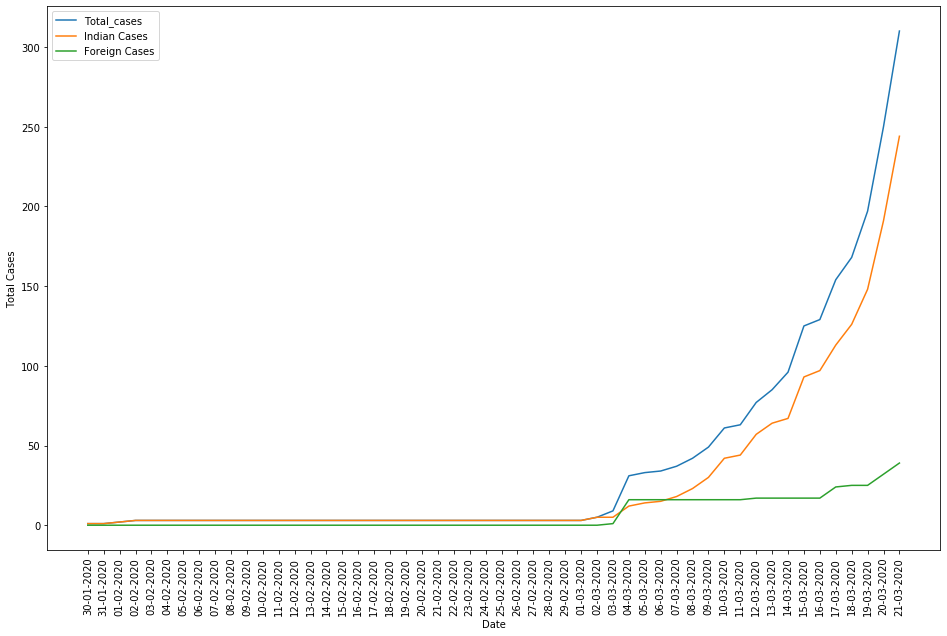

In [15]:
size = (16,10)
fig, ax = plt.subplots(figsize=size)
ax = plt.plot(df1['Date'],df1['Total_cases'], label="Total_cases")
ax = plt.plot(df1['Date'],df1['ConfirmedIndianNational'],label="Indian Cases")
ax = plt.plot(df1['Date'],df1['ConfirmedForeignNational'],label="Foreign Cases")
ax = plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total Cases',fontsize=10)

### Microtask - 4: Model the solution

#### Rate of increase of cases an each day

In [16]:
r = 0.0   
start_date = df1.index[df1['Date'] == '04-03-2020'][0]
end_date = df1.index[df1['Date'] == '21-03-2020'][0]
for i in range(start_date,end_date):
    curr_day_cases = df1.iloc[i]['Total_cases']
    next_day_cases = df1.iloc[i + 1]['Total_cases']
    daily_rate = (next_day_cases - curr_day_cases) / curr_day_cases
    r += daily_rate
r /= (end_date - start_date)

In [17]:
r

0.14814803793984233

#### Predicted Forecast value (P_t)

In [18]:
from math import exp

In [19]:
P_o = 31
t =26

In [20]:
P_t = P_o * exp(r * t)

In [21]:
P_t

1459.4810275382426

In [22]:
round(P_t,2)

1459.48

### Thank you :)